In [1]:
import projmodules as pm

eas=["Oroqen","Daur","Hezhen","Xibo","Japanese","Korean",
        "Tu","Han","Tujia","Miao","Yi","She","Naxi","Atayal",
        "Ami","Lahu","Dai","Kinh","Burmese","Thai","Cambodian","Tibetan","Uygur"]
samer=["Clovis","Pima","Mayan","Mixe","Zapotec","Piapoco",
        "Karitiana","Surui","Quechua","Chane","Nahua",
        "Cree","Chipewyan",'Saqqaq']
sib=["Aleut","Tlingit","Mansi","Chukchi","Tubalar","Kyrgyz","Ulchi",
    "Mongola","Altaian","Even","Yakut","Itelman",
    "Eskimo_Sireniki","Eskimo_Naukan","Eskimo_Chaplin"]
pacific=["Onge","Papuan","Maori","Igorot","Hawaiian",
         "Dusun","Bougainville","Australian"]
oasia=["Sherpa","Kusunda"]
ancids=['Yana_old','Yana_old2',"Tianyuan",'Longlin','Longlin_com','Xinyi',
        'Xinyi_other','LiangDaoChineseNeolithic','Boisman_MN',
        'BoshanChineseNeolithic','Bbdong','Linzi','HDYM1','HQSDW',
        'Zongri','Pukagongma','Chokhopani1','Mebrak','Samdzong',
        'Kolyma_River',"Donghuigou","Balikun"]
eup=["UstIshim","Oase1","Tianyuan","Kostenki14","GoyetQ116-1",
     "Vestonice16","Yana_old","Yana_old2",
     "Malta1",'AfontovaGora3',"ElMiron","Villabruna","Bichon",
     "Satsurblia","Kotias","Karelia","Motala12","Loschbour","LaBrana1",
     "Hungarian.KO1","Stuttgart","French","Sardinian","Saami"]
allids=eup+eas+ancids+samer+sib+pacific+oasia

baseDir = "/home/melinda_yang/data/2.2M/"
fh="UPA_all8"
newname = 'ALL01'
pm.indtoignore(allids, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


'Made par file for convertf!'

In [1]:
%%bash
pd="/home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/" #NEED TO MOVE TO admixture/ FIRST
fh="UPA_all8.ALL01"
idp=".200_25_0.5"
#cp ${pd}${fh}.ped.geno ${pd}${fh}.ped
#cp ${pd}${fh}.ped.ind ${pd}${fh}.pedind
#cut -c1-41 ${pd}${fh}.ped.snp > ${pd}${fh}.map

#echo "plink --noweb --file ${pd}${fh} --make-bed --out ${pd}${fh} --geno 0.999"



#echo "plink --noweb --bfile ${pd}${fh} --indep-pairwise 200 25 0.5 --out ${pd}${fh}_plink${idp}"

echo "plink --noweb --bfile ${pd}${fh} --extract ${pd}${fh}_plink${idp}.prune.in --make-bed --out ${pd}${fh}_plink${idp}"  ##Keep set of untargeted SNPs from above

##plink --noweb --bfile ${pd}${fh} --indep-pairwise 50 10 0.1  ##Prune dataset, using 50 SNP windows, step 10 SNPs, remove SNP pairs with R^2>0.1
##mv plink* .
#plink --noweb --bfile ${pd}${fh} --indep-pairwise 200 25 0.5 --out ${pd}plink${idp}
#plink --noweb --bfile ${pd}${fh} --extract ${pd}plink${idp}.prune.in --make-bed --out ${pd}${fh}_pruned${idp}  ##Keep set of untargeted SNPs from above

plink --noweb --bfile /home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/UPA_all8.ALL01 --extract /home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/UPA_all8.ALL01_plink.200_25_0.5.prune.in --make-bed --out /home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/UPA_all8.ALL01_plink.200_25_0.5


In [2]:
%%writefile /home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/UPA_all8.ALL01_runadmixture.sh
#%%bash
##also do cv at runadmixturecv.sh

pd="/home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/"
fh="UPA_all8.ALL01_plink.200_25_0.5"
for K in `seq 2 10`; do 
    admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out
    #admixture ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.${K}.out &
    #admixture --cv ${pd}${fh}.bed ${K} | tee ${pd}${fh}.admix.log${K}.out
    #echo "admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out"
    #echo "admixture ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.${K}.out"
done

grep -h CV ${pd}${fh}.admix.log*out > ${pd}${fh}.admix.CVerror ##get CVerrors

Writing /home/melinda_yang/projects/bronzeage/2.2M_analysis/admixture/UPA_all8.ALL01_runadmixture.sh


In [13]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
##MAKE ADMIXTURE PLOT
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH4.HOanceas_wEur_pruned.200_25_0.5"
mypops=c("Tianyuan","Boshan","Donghuigou","Balikun","Zhougongmiao","Yaojia","Linzi","XianShang",
        "Zongri","Huoshaogou","Wuba","Xiaoshuangqiao","Guandimiao","Shengedaliang",
        "Muzhuzhuliang","Xinhua","Wuzhuangguo","Shimao","Tonglin","French","Han_NChina")
#for (K in c(2,3,4,5,6,7,8,9,10)) {
for (K in c(2,3,4)) {
    tbl=read.table(paste(pd,fh,".",K,".wID.Q",sep=""))
    tbl=tbl[with(tbl,order(tbl[,K+3],tbl[,3],tbl[,1],tbl[,2],tbl[,4])),]
    if (K==2){
       tblnames=c()
        for (i in tbl[,K+3]) {
            if (i %in% tblnames==TRUE) {
                tblnames=c(tblnames," ")
            }
            else {
                tblnames=c(tblnames,i)
            }
        } 
    }
    #png(paste(pd,"images/",fh,".",K,".png",sep=""),width=2400,height=600)
    #barplot(t(as.matrix(tbl)), col=rainbow(K),xlab="Individual #", ylab="Ancestry", border=NA,names.arg=tblnames,las=2,cex.names=0.7)
    #dev.off()
    for (mypop in mypops) {
    	png(paste(pd,"images/",fh,".",mypop,".",K,".png",sep="")) #,width=2400,height=600)
    	subtbl=subset(tbl,tbl[,K+3]==mypop)[,1:4]
    	mynames=rep("",nrow(subtbl))
    	barplot(t(as.matrix(subtbl)), col=rainbow(K),xlab="Individual #", ylab="Ancestry", border=NA,names.arg=mynames,las=2,cex.names=0.7)
		dev.off()
        }
    
    
}


Overwriting /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R


In [51]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
##MAKE ADMIXTURE PLOT
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH4.HOanceas_wEur_pruned.200_25_0.5"
mypops=c("Tianyuan","Boshan","Donghuigou","Balikun","Zhougongmiao","Yaojia","Linzi","XianShang",
        "Zongri","Huoshaogou","Wuba","Xiaoshuangqiao","Guandimiao","Shengedaliang",
        "Muzhuzhuliang","Xinhua","Wuzhuangguo","Shimao","Tonglin") #,"French","Han_NChina","Han_Shandong",
        #"Dai","Ulchi")
subset='anc'
for (K in c(4)) {
    tbl=read.table(paste(pd,fh,".",K,".wID.Q",sep=""))
    tbl=tbl[with(tbl,order(tbl[,K+3],tbl[,4],tbl[,1],tbl[,2],tbl[,3])),]
    if (K==4){
       tblnames=c()
        for (i in tbl[,K+3]) {
        	if (i %in% mypops) {
                 if (i %in% tblnames==TRUE) {
                    tblnames=c(tblnames," ")
                }
                else {
                    tblnames=c(tblnames,i)
                }        
            }
        } 
    }
    png(paste(pd,"images/",fh,".",subset,".",K,".png",sep=""),width=2400,height=600)
    subtbl=subset(tbl,V7%in%mypops)[,1:4]
    #mynames=rep("",nrow(subtbl))
    mynames=subtbl$V7
    barplot(t(as.matrix(subtbl)), col=rainbow(K),xlab="Individual #", ylab="Ancestry", border=NA,names.arg=tblnames,las=2,cex.names=0.7)
    dev.off()
    #for (mypop in mypops) {
    #	png(paste(pd,"images/",fh,".",mypop,".",K,".png",sep="")) #,width=2400,height=600)
    #	subtbl=subset(tbl,V7==mypop)[,1:4]
    #	mynames=rep("",nrow(subtbl))
    #	barplot(t(as.matrix(subtbl)), col=rainbow(K),xlab="Individual #", ylab="Ancestry", border=NA,names.arg=mynames,las=2,cex.names=0.7)
	#	dev.off()
    #}
    
}

Overwriting /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R


In [ ]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
indfh="ind_A_v13_TBH4.HOanceas_wEur"
Qfh="ind_A_v13_TBH4.HOanceas_wEur_pruned.200_25_0.5"
K=2
for K in 2 3 4; do # 5 6 7 8 9 10; do 
    grep -v Ignore ${pd}${indfh}.ind > ${pd}${indfh}.noIgnore.ind
    paste ${pd}${Qfh}.${K}.Q ${pd}${indfh}.noIgnore.ind > ${pd}${Qfh}.${K}.wID.Q
done

In [52]:
%%bash
R CMD BATCH /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
mv /home/mel_yang/notebooks/bronzeage/admixtureplot.Rout /mnt/solexa/mel_yang/bronzeage/admixture/

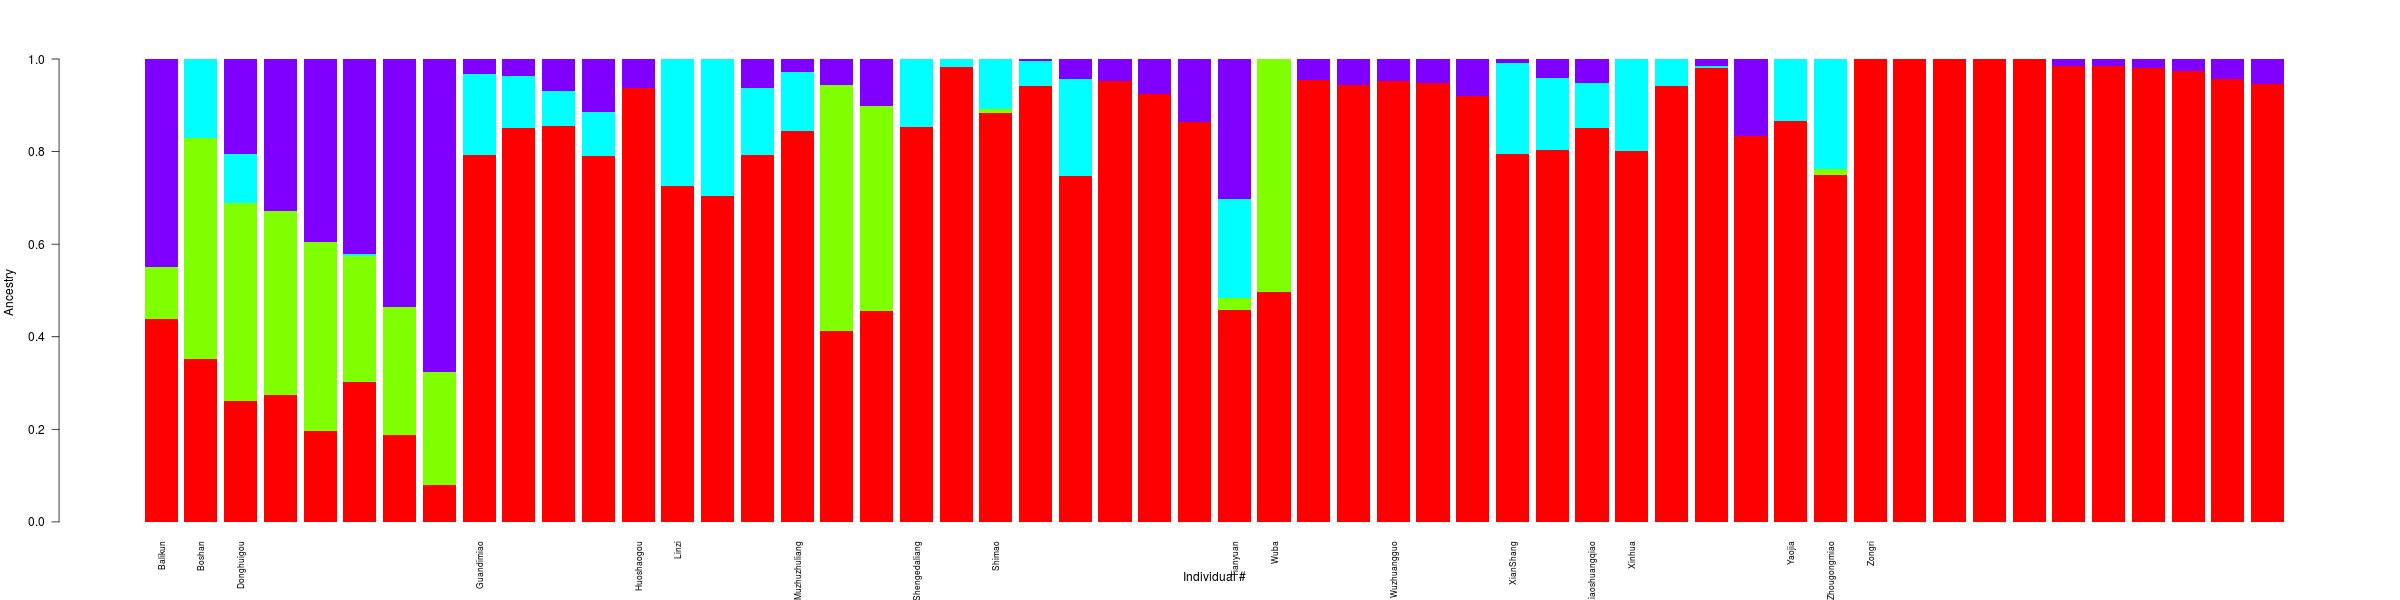

In [53]:
from IPython.core.display import Image 
pd="/mnt/solexa/mel_yang/bronzeage/admixture/images/"
fh="ind_A_v13_TBH4.HOanceas_wEur_pruned.200_25_0.5"
subset="anc."
K=4
Image(pd+fh+"."+subset+str(K)+".png") 

In [ ]:
import projmodules as pm

pdeas=['Daur','Hezhen','Mongola','Naxi','Oroqen','Ulchi','Xibo','Dai','Dong','Gelao',
        'Lahu','Li','Maonan','Miao','Mulam','She','Tujia','Yi','Zhuang','Cambodian',
        'Han_Chongqing','Han_Fujian','Han_Guandong','Han_Henan','Han_HGDP','Han_Hubei',
        'Han_Jiangsu','Han_NChina','Han_Shandong','Han_Shanghai','Han_Shanxi',
        'Han_Sichuan','Han_Zhejiang','Kinh_Vietnam_KHV','Korean','Thai','Qiang_Horpa',
        'Tibetan_Chamdo','Tibetan_Gangcha','Tibetan_Gannan','Tibetan_Lhasa',
        'Tibetan_Nagqu','Tibetan_Shannan','Tibetan_Shigatse','Tibetan_Xinlong',
        'Tibetan_Xunhua','Tibetan_Yajiang','Japanese','Ami_Stoneking','Atayal_Stoneking', ##where ended originally
        'Tu','Dongxiang','Kyrgyz_China','Kyrgyz','Kazakh_China','Kazakh','Uygur','Mongol',
        'Tibetan_Yunnan','Bunun','Tao','Burmese','Vietnamese','Paiwan','Rukai','Hakka',
        'Minnan','Pingpu','Atayal_Coriell','Ami_Coriell','Bonan','Yugur_Eastern',
        'Yugur_Western','Salar']
pdeur=["French",'Sardinian']

baseDir = "/home/mel_yang/projects/bronzeage/"
fh="ind_A_v13_TBH"
newname = 'allpdeas_weurFS'
pm.indtoignore(pdeas+pdeur, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


In [ ]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS"
idp=".200_25_0.5"
#cp ${pd}${fh}.ped.geno ${pd}${fh}.ped
#cp ${pd}${fh}.ped.ind ${pd}${fh}.pedind
#cut -c1-41 ${pd}${fh}.ped.snp > ${pd}${fh}.map

plink --noweb --file ${pd}${fh} --make-bed --out ${pd}${fh} --geno 0.999

##plink --noweb --bfile ${pd}${fh} --indep-pairwise 50 10 0.1  ##Prune dataset, using 50 SNP windows, step 10 SNPs, remove SNP pairs with R^2>0.1
##mv plink* .

#echo "plink --noweb --bfile ${pd}${fh} --indep-pairwise 200 25 0.5 --out ${pd}plink${idp}"

#plink --noweb --bfile ${pd}${fh} --indep-pairwise 200 25 0.5 --out ${pd}plink${idp}
#plink --noweb --bfile ${pd}${fh} --extract ${pd}plink${idp}.prune.in --make-bed --out ${pd}${fh}_pruned${idp}  ##Keep set of untargeted SNPs from above

In [ ]:
%%bash
#%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/runadmixture.sh
##also do cv at runadmixturecv.sh

pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
#for K in `seq 2 10`; do 
    #admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out
    #admixture ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.${K}.out &
    #admixture --cv ${pd}${fh}.bed ${K} | tee ${pd}${fh}.admix.log${K}.out
    #echo "admixture --cv ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.log${K}.out"
    #echo "admixture ${pd}${fh}.bed ${K} > ${pd}${fh}.admix.${K}.out"
#done

grep -h CV ${pd}${fh}.admix.log*out > ${pd}${fh}.admix.CVerror ##get CVerrors

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
CVfile=open(pd+fh+".admix.CVerror",'r')
K_CVs=[]
for line in CVfile:
    x=line.split()
    K_CVs.append((int(x[2][3:-2]),float(x[3])))

K_CVs.sort(key=lambda K_CVs: K_CVs[0])
Ks,CVs=[list(t) for t in zip(*K_CVs)] 
for K, CV in K_CVs:
    print K, CV
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Ks,CVs,'-o')

In [ ]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
##MAKE ADMIXTURE PLOT
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
#for (K in c(2,3,4,5,6,7,8,9,10)) {
for (K in c(2,3,4,5)) {
    tbl=read.table(paste(pd,fh,".",K,".wID.Q",sep=""))
    tbl=tbl[with(tbl,order(tbl[,K+3],tbl[,3],tbl[,1],tbl[,2],tbl[,4])),]
    if (K==2){
       tblnames=c()
        for (i in tbl[,K+3]) {
            if (i %in% tblnames==TRUE) {
                tblnames=c(tblnames," ")
            }
            else {
                tblnames=c(tblnames,i)
            }
        } 
    }
    png(paste(pd,"images/",fh,".",K,".png",sep=""),width=2400,height=600)
    barplot(t(as.matrix(tbl)), col=rainbow(K),xlab="Individual #", ylab="Ancestry", border=NA,names.arg=tblnames,las=2,cex.names=0.7)
    dev.off()
}


In [ ]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
indfh="ind_A_v13_TBH.allpdeas_weurFS"
Qfh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
K=2
for K in 2 3 4 5 6 7 8 9 10; do 
    grep -v Ignore ${pd}${indfh}.ind > ${pd}${indfh}.noIgnore.ind
    paste ${pd}${Qfh}.${K}.Q ${pd}${indfh}.noIgnore.ind > ${pd}${Qfh}.${K}.wID.Q
done

In [ ]:
%%bash
R CMD BATCH /mnt/solexa/mel_yang/bronzeage/admixture/admixtureplot.R
mv /home/mel_yang/notebooks/bronzeage/admixtureplot.Rout /mnt/solexa/mel_yang/bronzeage/admixture/

In [ ]:
from IPython.core.display import Image 
pd="/mnt/solexa/mel_yang/bronzeage/admixture/images/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
K=5
Image(pd+fh+"."+str(K)+".png") 

In [ ]:
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
K=4
Qfile=open(pd+fh+"."+str(K)+".wID.Q",'r')
myKs=[]
for line in Qfile: myKs.append(tuple([float(i) if ind in [0,1,2,3] else i for ind,i in enumerate(line.split())]))
Qfile.close()
#myKs.sort(key=lambda myKs: myKs[0])
K1,K2,K4,K3,IDs,sex,Pop=[list(t) for t in zip(*myKs)] 
K1pops = [Pop[ind] for ind,i in enumerate(K1) if i>0.99] ##red Tibetan
K2pops = [Pop[ind] for ind,i in enumerate(K2) if i>0.99] ##green Ulchi
K3pops = [Pop[ind] for ind,i in enumerate(K3) if i>0.99] ##EUR
K4pops = [Pop[ind] for ind,i in enumerate(K4) if i>0.99] ##blue South China
K1K2pops=[Pop[ind] for ind,i in enumerate(K1) if i>0.1 and K2[ind]>0.1 and K4[ind]<0.05 and K3[ind]<0.05]
K1K4pops=[Pop[ind] for ind,i in enumerate(K1) if i>0.1 and K2[ind]<0.05 and K4[ind]>0.1 and K3[ind]<0.05]
K2K4pops=[Pop[ind] for ind,i in enumerate(K1) if i<0.05 and K2[ind]>0.1 and K4[ind]>0.1 and K3[ind]<0.05]
K1K2K4pops=[Pop[ind] for ind,i in enumerate(K1) if i>0.1 and K2[ind]>0.1 and K4[ind]>0.1 and K3[ind]<0.05]
print len(K1pops), len(K2pops), len(K4pops), len(K1K2pops), len(K1K4pops), len(K2K4pops), len(K1K2K4pops)
print "K1\t%i\t" % len(K1pops), ' '.join(K1pops)
print "K2\t%i\t" % len(K2pops), ' '.join(K2pops)
print "K4\t%i\t" % len(K4pops), ' '.join(K4pops)
print "K1K2\t%i\t" % len(K1K2pops), ' '.join(K1K2pops)
print "K1K4\t%i\t" % len(K1K4pops), ' '.join(K1K4pops)
print "K2K4\t%i\t" % len(K2K4pops), ' '.join(K2K4pops)
print "K1K2K4\t%i\t" % len(K1K2K4pops), ' '.join(K1K2K4pops), len([i for i in K1K2K4pops if i=="Japanese"])

In [ ]:
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
subdir="allpdeas_weurFS_pruned.200_25_0.5_NOREF/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
K=5
Qfile=open(pd+subdir+fh+"."+str(K)+".wID.Q",'r')
print pd+subdir+fh+"."+str(K)+".wID.Q"
myKs=[]
for line in Qfile: myKs.append(tuple([float(i) if ind in [0,1,2,3,4] else i for ind,i in enumerate(line.split())]))
Qfile.close()
co1K=0.95
coin=0.1
coex=0.05
K1,K2,K4,K3,K5,IDs,sex,Pop=[list(t) for t in zip(*myKs)] 
K1pops = [IDs[ind] for ind,i in enumerate(K1) if K1[ind]>co1K] ##Atayal
K2pops = [IDs[ind] for ind,i in enumerate(K2) if K2[ind]>co1K] ##Maonan/Gelao/Zhuang
K3pops = [IDs[ind] for ind,i in enumerate(K3) if K3[ind]>co1K] ##EUR
K4pops = [IDs[ind] for ind,i in enumerate(K4) if K4[ind]>co1K] ##Tibetan
K5pops = [IDs[ind] for ind,i in enumerate(K5) if K5[ind]>co1K] ##Ulchi
K1K2pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]>coin and K2[ind]>coin and K4[ind]<coex and K5[ind]<coex and K3[ind]<coex]
K1K4pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]>coin and K2[ind]<coex and K4[ind]>coin and K5[ind]<coex and K3[ind]<coex]
K1K5pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]>coin and K2[ind]<coex and K4[ind]<coex and K5[ind]>coin and K3[ind]<coex]
K2K4pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]<coex and K2[ind]>coin and K4[ind]>coin and K5[ind]<coex and K3[ind]<coex]
K2K5pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]<coex and K2[ind]>coin and K4[ind]<coex and K5[ind]>coin and K3[ind]<coex]
K4K5pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]<coex and K2[ind]<coex and K4[ind]>coin and K5[ind]>coin and K3[ind]<coex]
K1K2K4pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]>coin and K2[ind]>coin and K4[ind]>coin and K5[ind]<coex and K3[ind]<coex]
K1K2K5pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]>coin and K2[ind]>coin and K4[ind]<coex and K5[ind]>coin and K3[ind]<coex]
K2K4K5pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]<coex and K2[ind]>coin and K4[ind]>coin and K5[ind]>coin and K3[ind]<coex]
K1K2K4K5pops=[IDs[ind] for ind,i in enumerate(K1) if K1[ind]>coin and K2[ind]>coin and K4[ind]>coin and K5[ind]>coin and K3[ind]<coex]
mylst=[K1pops,K2pops,K4pops,K5pops,K1K2pops,K1K4pops,K1K5pops,K2K4pops,K2K5pops,K4K5pops,K1K2K4pops,K1K2K5pops,K2K4K5pops,K1K2K4K5pops]
mynames=["K1","K2","K4","K5","K1K2","K1K4","K1K5","K2K4","K2K5","K4K5","K1K2K4","K1K2K5","K1K2K4K5"]
mynames2=["AtayalSet","SAsiaSet","TibetanSet","UlchiSet","AmiSet","None","None","NWChinaSet",
          "None","Tibetan_GangchaSet","PingpuHakkaSet","None","NEChinaSet"]
mynames2=[i+"_"+mynames[ind] for ind,i in enumerate(mynames2)]
print ' '.join([str(len(i)) for i in mylst])
for ind,myK in enumerate(mynames):
    #print "%s\t%i\t%s" % (myK, len(mylst[ind]), ','.join(mylst[ind]))
    print "%s\t%i\t%s" % (myK, len(mylst[ind]), mynames2[ind])

    
##Make new ind file with labels in mynames2
pd="/home/mel_yang/projects/bronzeage/"
fh="ind_A_v13_TBH"
newsubset="allpdeas_weurFS_pruned.200_25_0.5"
indfile=open(pd+fh+".ind",'r')
newindfile=open(pd+fh+"."+newsubset+".ind",'w')
for ind,line in enumerate(indfile):
    x=line.split()
    myindex=-5
    for Kind,Kset in enumerate(mylst):
        if x[0] in Kset: myindex=Kind
    if myindex==-5: newindfile.write('\t'.join(x)+'\n')
    else: newindfile.write(x[0]+'\t'+x[1]+'\t'+mynames2[myindex]+'\n')
indfile.close()
newindfile.close()
##coin=0.1   ===>   17 67 88 64 26 33 0 0 78 0 2 5 0 137 0
##coin=0.15  ===>   17 67 88 64 26 24 0 0 65 0 0 1 0 102 0
##coin=0.2   ===>   17 67 88 64 26 10 0 0 50 0 0 0 0 23 0

In [ ]:
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
subdir="allpdeas_weurFS_pruned.200_25_0.5_NOREF/"
fh="ind_A_v13_TBH.allpdeas_weurFS_pruned.200_25_0.5"
K=5
Qfile=open(pd+subdir+fh+"."+str(K)+".wID.Q",'r')
print pd+subdir+fh+"."+str(K)+".wID.Q"
myKs=[]
for line in Qfile: myKs.append(tuple([float(i) if ind in [0,1,2,3,4] else i for ind,i in enumerate(line.split())]))
Qfile.close()
K1,K2,K4,K3,K5,IDs,sex,Pop=[list(t) for t in zip(*myKs)] 
K1pops = [Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.95] ##Atayal
K2pops = [Pop[ind] for ind,i in enumerate(K2) if K2[ind]>0.95] ##Maonan/Gelao/Zhuang
K3pops = [Pop[ind] for ind,i in enumerate(K3) if K3[ind]>0.95] ##EUR
K4pops = [Pop[ind] for ind,i in enumerate(K4) if K4[ind]>0.95] ##Tibetan
K5pops = [Pop[ind] for ind,i in enumerate(K5) if K5[ind]>0.95] ##Ulchi
K1K2pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.1 and K2[ind]>0.1 and K4[ind]<0.05 and K5[ind]<0.05 and K3[ind]<0.05]
K1K4pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.1 and K2[ind]<0.05 and K4[ind]>0.1 and K5[ind]<0.05 and K3[ind]<0.05]
K1K5pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.1 and K2[ind]<0.05 and K4[ind]<0.05 and K5[ind]>0.1 and K3[ind]<0.05]
K2K4pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]<0.05 and K2[ind]>0.1 and K4[ind]>0.1 and K5[ind]<0.05 and K3[ind]<0.05]
K2K5pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]<0.05 and K2[ind]>0.1 and K4[ind]<0.05 and K5[ind]>0.1 and K3[ind]<0.05]
K4K5pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]<0.05 and K2[ind]<0.05 and K4[ind]>0.1 and K5[ind]>0.1 and K3[ind]<0.05]
K1K2K4pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.1 and K2[ind]>0.1 and K4[ind]>0.1 and K5[ind]<0.05 and K3[ind]<0.05]
K1K2K5pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.1 and K2[ind]>0.1 and K4[ind]<0.05 and K5[ind]>0.1 and K3[ind]<0.05]
K2K4K5pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]<0.05 and K2[ind]>0.1 and K4[ind]>0.1 and K5[ind]>0.1 and K3[ind]<0.05]
K1K2K4K5pops=[Pop[ind] for ind,i in enumerate(K1) if K1[ind]>0.1 and K2[ind]>0.1 and K4[ind]>0.1 and K5[ind]>0.1 and K3[ind]<0.05]
mylst=[K1pops,K2pops,K3pops,K4pops,K5pops,K1K2pops,K1K4pops,K1K5pops,K2K4pops,K2K5pops,K4K5pops,K1K2K4pops,K1K2K5pops,K2K4K5pops,K1K2K4K5pops]
mynames=["K1","K2","K3","K4","K5","K1K2","K1K4","K1K5","K2K4","K2K5","K4K5","K1K2K4","K1K2K5","K1K2K4K5"]
mynames2=["AtayalSet","MaonanSet","EURSet","TibetanSet","UlchiSet","AmiSet","None","None","NWChinaSet",
          "None","Tibetan_GangchaSet","PingpuHakkaSet","None","NEChinaSet"]
print ' '.join([str(len(i)) for i in mylst])
for ind,myK in enumerate(mynames):
    print "%s\t%i\t%s" % (myK, len(mylst[ind]), ','.join(mylst[ind]))
    #print "%s\t%i\t%s" % (myK, len(mylst[ind]), mynames2[ind])


In [ ]:
set(mylst[0]+mylst[1]+mylst[2]+mylst[3]+
    mylst[4]+mylst[5]+mylst[6]+mylst[7]+
    mylst[8]+mylst[9]+mylst[10]+mylst[11]
    +mylst[12]+mylst[13]).intersection(mylst[14])

In [ ]:
pdeas=['Daur','Hezhen','Mongola','Naxi','Oroqen','Ulchi','Xibo','Dai','Dong','Gelao',
        'Lahu','Li','Maonan','Miao','Mulam','She','Tujia','Yi','Zhuang','Cambodian',
        'Han_Chongqing','Han_Fujian','Han_Guandong','Han_Henan','Han_HGDP','Han_Hubei',
        'Han_Jiangsu','Han_NChina','Han_Shandong','Han_Shanghai','Han_Shanxi',
        'Han_Sichuan','Han_Zhejiang','Kinh_Vietnam_KHV','Korean','Thai','Qiang_Horpa',
        'Tibetan_Chamdo','Tibetan_Gangcha','Tibetan_Gannan','Tibetan_Lhasa',
        'Tibetan_Nagqu','Tibetan_Shannan','Tibetan_Shigatse','Tibetan_Xinlong',
        'Tibetan_Xunhua','Tibetan_Yajiang','Japanese','Ami_Stoneking','Atayal_Stoneking']
latlong=[0 for i in pdeas]
HOannofile=open("/home/mel_yang/data/HO/v12.1_HO.anno")
for ind,line in enumerate(HOannofile):
    x=line.split('\t')
    #print x[4],x[5],x[11],x[12]
    if x[5] in pdeas and x[5] != 'Thai': ##indexing off for Thai 
        latlong[pdeas.index(x[5])] = (float(x[11]),float(x[12]))
        #print x[5],x[11],x[12]
    #if ind==2: break
    
latlong[pdeas.index("Thai")]=(13.8,100.5)
latlong[pdeas.index("Han_NChina")]=(32.26566812,114)
latlong[pdeas.index("Ami_Stoneking")]=(22.843145,121.185356)
latlong[pdeas.index("Atayal_Stoneking")]=(24.611712,121.296444)
newfile=open("/mnt/solexa/mel_yang/bronzeage/admixture/pdeas.GPS",'w')
for ind,i in enumerate(pdeas):
    newfile.write("%s\t%.2f\t%.2f\n" % (i, latlong[ind][0], latlong[ind][1]))
newfile.close()

In [ ]:
%%writefile /mnt/solexa/mel_yang/bronzeage/admixture/admixture_2Dmap_pie.R
##Make map of Asia with ADMIXTURE components plotted in pie chart at GPS locations
pd="/mnt/solexa/mel_yang/bronzeage/admixture/"
fh="ind_A_v13_TBH.pdeas_weurFS_pruned.200_25_0.5"
K=4
mydat=read.table(paste(pd,fh,".",K,".wID.Q",sep=""))  
location<-read.table(paste(pd,'pdeas.GPS',sep=""))

Longitude=location$V3
Latitude=location$V2
minLong <- 80
maxLong <- 145
minLat <- 10
maxLat <- 60

library(mapdata)
library(maps)
library(maptools)
library(mapplots)
png(paste(pd,"images/",fh,".",K,".asia.png",sep=""),width=2400,height=2400)    
map(database='worldHires', fill=TRUE,xlim=c(minLong,maxLong),ylim=c(minLat,maxLat),col='lightgray',boundary=FALSE)
#points(Longitude,Latitude,pch=21,bg="black",col="black",cex=3)
for (i in 1:nrow(location)) {
    text(Longitude[i],Latitude[i],location$V1[i],cex=1.5)
}

#mysubdat <- as.data.frame(matrix(seq(nrow(location)*(K)),nrow=nrow(location),ncol=K))
#width=c()
#height=c()
#for (myrow in 1:nrow(location)){
#    z=subset(tbl,tbl$V7==as.character(location$V1[myrow]))[1,]
#    mysubdat[myrow,]=z[,1:K]
#    width=c(width,1)
#    height=c(height,1)
#    #z=t(as.matrix(z))
#    #draw.barplot2D(location$V3[myrow], location$V2[myrow], z,1,1,col=rainbow(K))
#}
#nrow(mysubdat)
#length(Longitude)
#length(Latitude)
#xyz <- make.xyz(Longitude,Latitude,t(mysubdat),as.factor(location$V1))
#draw.barplot2D(xyz$x, xyz$y, xyz$z,width,height,col=rainbow(K))


dev.off()

In [ ]:
%%bash
Rfunc="admixture_2Dmap_pie"
pd1="/mnt/solexa/mel_yang/bronzeage/admixture/"
R CMD BATCH ${pd1}${Rfunc}.R
mv /home/mel_yang/notebooks/bronzeage/${Rfunc}.Rout ${pd1}

In [ ]:
from IPython.core.display import Image 
pd="/mnt/solexa/mel_yang/bronzeage/admixture/images/"
fh="ind_A_v13_TBH.pdeas_weurFS_pruned.200_25_0.5"
K=4
Image(pd+fh+"."+str(K)+".asia.png") 

In [ ]:
import projmodules as pm

namers=['Mayan','Piapoco','Xavante','Surui','Mixe','Pima','Karitiana',
        'Chane',"Quechua","Zapotec","Aymara","Guarani","Guarani_GN","Guarani_KW",
        "Cabecar","Kaqchikel","Wayuu","Inga","Ticuna","Chilote","Bolivian",
        "Apalai","Arara","UrubuKaapor","Zoro",
        "Surui.DG","Mixe.DG","Pima.DG","Mayan.DG","Quechua.DG","Zapotec.DG",
        "Piapoco.DG","Chane.DG","Karitiana.DG",
        "Mbuti","Yoruba","Spanish","French","Han_HGDP","Japanese"]

baseDir = "/home/melinda_yang/ivpp/bronzeage/"
fh="ind_A_v13_TBH"
newname = 'namer'
pm.indtoignore(namers, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


In [ ]:
##MAKE MAP FILE FROM SNP FILE
pd = "/home/melinda_yang/ivpp/bronzeage/"
pd = "/home/melinda_yang/ivpp/allTYstuff/"
fh="ind_A_v13_TBH.namer_noasn.ped"
newfh="ind_A_v13_TBH.namer_noasn"
fh="ind_A_v13_TBH.namer.ped"
newfh="ind_A_v13_TBH.namer"
fh="ind_A_v13_TBH.namer_sgdp_noasn.ped"
newfh="ind_A_v13_TBH.namer_sgdp_noasn"
fh="UPA_all6.namer.ped"
newfh="UPA_all6.namer"
snpfile=open(pd+fh+".snp",'r')
mapfile=open(pd+newfh+".map",'w')
for line in snpfile:
    x=line.split()
    if x[2] == "0.498278": print x
    newx=[x[i] for i in [0,1,2,3]]
    mapfile.write('\t'.join(newx)+'\n')

In [ ]:
import projmodules as pm

namers=['Mayan','Piapoco','Xavante','Surui','Mixe','Pima','Karitiana',
        'Chane',"Quechua","Zapotec","Aymara","Guarani","Guarani_GN","Guarani_KW",
        "Cabecar","Kaqchikel","Wayuu","Inga","Ticuna","Chilote","Bolivian",
        "Apalai","Arara","UrubuKaapor","Zoro",
        "Surui.DG","Mixe.DG","Pima.DG","Mayan.DG","Quechua.DG","Zapotec.DG",
        "Piapoco.DG","Chane.DG","Karitiana.DG",
        "Mbuti","Yoruba","Mandenka","Spanish","French","Sardinian"]

baseDir = "/home/melinda_yang/ivpp/bronzeage/"
fh="ind_A_v13_TBH"
newname = 'namer_noasn'
pm.indtoignore(namers, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


In [ ]:
import projmodules as pm

namers=["Surui.DG","Mixe.DG","Pima.DG","Mayan.DG","Quechua.DG","Zapotec.DG",
        "Piapoco.DG","Chane.DG","Karitiana.DG",
        "Mbuti.DG","Yoruba.DG","Mandenka.DG","Spanish.DG","French.DG","Sardinian.DG"]

baseDir = "/home/melinda_yang/ivpp/bronzeage/"
fh="ind_A_v13_TBH"
newname = 'namer_sgdp_noasn'
pm.indtoignore(namers, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


In [ ]:
import projmodules as pm

namers=["Surui","Mixe","Pima","Mayan","Quechua","Zapotec",
        "Piapoco","Chane","Karitiana",
        "Mbuti","Yoruba","Mandenka","Spanish","French","Sardinian"] #,"Han","Japanese"]

baseDir = "/home/melinda_yang/ivpp/allTYstuff/"
fh="UPA_all6"
newname = 'namer_nbs' #nobadsnps
pm.indtoignore(namers, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',
                indfilename=baseDir+fh+'.'+newname,
               badsnpfile=baseDir+"UPA_all6.namer.badsnps")


In [ ]:

pd="/home/melinda_yang/ivpp/allTYstuff/"
badrs=open(pd+"UPA_all6.namer_missing.nof",'r')
badrsids=[line.strip() for line in badrs]
badrs.close()
snps=open(pd+"UPA_all6.namer.ped.snp",'r')
newbad=open(pd+"UPA_all6.namer.badsnps",'w')
for line in snps:
    x=line.split()
    if x[1] in badrsids: newbad.write('\t'.join(x)+'\n')
newbad.close()
snps.close()


In [ ]:
import projmodules as pm

targets = ['Chane','Karitiana','Mayan','Mixe','Mixtec','Piapoco','Pima','Quechua','Surui','Zapotec','Clovis','French']

baseDir = "/home/mel_yang/projects/allTYstuff/SOMX2/"
fh="UPA_all2"
newname = 'namer_french'
pm.indtoignore(targets, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


In [ ]:
import projmodules as pm

targets = ['Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 
              'Han', 'Hezhen', 'Japanese', 'Kinh', 'Korean', 'Lahu', 
              'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 
              'Uygur', 'Xibo', 'Yi','French']

baseDir = "/home/mel_yang/projects/allTYstuff/SOMX2/"
fh="UPA_all2"
newname = 'eas_french'
pm.indtoignore(targets, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
baseDir = '/home/mel_yang/projects/allTYstuff/SOMX2/'
fh = 'UPA_all2.namer'
myfile = open(baseDir+fh+'.3.Q','r')
mydat = myfile.readlines()
myfile.close()
mydat = np.array([[float(i) for i in line.split()] for line in mydat])
print mydat.shape
plt.bar( #, col=['red','blue','yellow'])
#barplot(t(as.matrix(tbl)), col=rainbow(3),xlab="Individual #", ylab="Ancestry", border=NA)